**Keuntungan** (Inggris: ***return***) adalah prosentase perubahan nilai terhadap nilai awal. Misalnya investasi awal adalah satu juta rupiah, lalu dalam satu tahun investasinya berkembang menjadi 1,1 juta rupiah, maka keuntungannya adalah 10%, atau 0.10. Dalam tulisan ini kita akan melakukan analisa terhadap angka-angka keuntungan sebagai bagian dari analisa portfolio.

## Definisi

Keuntungan (*Return*) didefinisikan sebagai:

$$ R_{t-1,t} = \frac{P_t - P_{t-1}}{P_{t-1}} $$

dimana:
* $R_{t-1,t}$   : keuntungan (*return*) untuk rentang waktu *t-1* sampai *t*
* $P_t$   : (nilai) portfolio pada waktu *t*
* $P_{t-1}$ : (nilai) portfolio pada waktu *t-1*


## Karakterisasi dari Keuntungan

Mari kita sintesa data **`prices`** yang berisi harga dua buah aset (katakanlah namanya ***"Biru"*** dan ***"Oranye"***) dalam rentang 12 bulan (catatan: karena rentangnya 12 bulan, maka ada 13 baris harga).

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, HTML

%matplotlib inline
FIGSIZE=(8,4)
prices = pd.DataFrame(data={
                        'Biru': [8.7   , 8.9055, 8.7113, 8.4346, 
                                 8.7254, 9.0551, 8.9514, 9.2439,
                                 9.1276, 9.3976, 9.4554, 9.5704, 
                                 9.7728],
                        'Oranye': [10.66  , 11.0828, 10.71  , 11.5907, 
                                   12.107 , 11.7876, 11.2078, 12.5192, 
                                   13.3624, 14.408 , 11.9837, 12.2718, 11.5892]
                      },
                      columns=['Biru', 'Oranye'])
prices.index.name = 'Bulan'
prices

,Biru,Oranye
Bulan,,
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624


Mari kita rubah data harga di atas menjadi data keuntungan. Hal ini sangat mudah dilakukan.

In [26]:
returns = prices.pct_change()
returns

,Biru,Oranye
Bulan,,
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353


Kita *plot* data keuntungan tersebut:

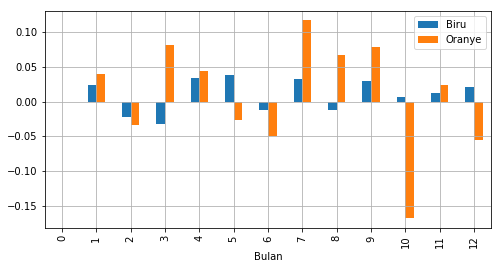

In [33]:
returns.plot.bar(figsize=FIGSIZE, grid=True)

Dari grafik di atas, secara intuitif kita bisa melihat keduanya berbeda. Misalnya, aset Oranye mempunyai ***volatilitas*** yang lebih besar dari aset Biru. Mari kita lihat karakterisasi kedua aset itu secara lebih detil.

## Karakterisasi 1: Rata-Rata Keuntungan (*Average Returns*)

Tahukah Anda, bahwa  kedua aset tersebut menghasilkan keuntungan rata-rata yang sama tiap bulannya?

In [29]:
returns.mean()

Biru      0.01
Oranye    0.01
dtype: float64

Kedua aset tersebut sama-sama memberikan rata-rata keuntungan sebesar ***1%*** tiap bulannya.

Dengan demikian, kita dapat simpulkan bahwa rata-rata keuntungan (*average returns*) bukanlah cara yang baik untuk melihat karakteristik suatu aset, bahkan mungkin bisa menyesatkan.

Cara lain untuk melihat perbedaan adalah dengan melihat apa yang terjadi kalau kita berinvestasi pada kedua aset di atas. Misalkan kita tanamkan uang satu juta rupiah, maka berikut adalah hasilnya setelah 12 bulan.

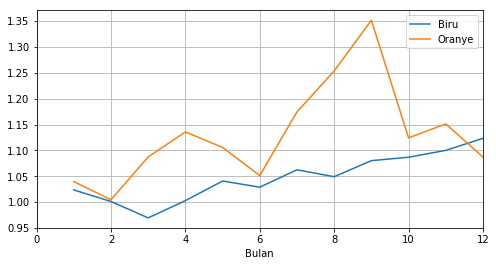

In [32]:
(returns + 1).cumprod().plot(figsize=FIGSIZE, grid=True)

Dari grafik di atas terlihat jelas bahwa karakter pergerakan nilai portfolio kedua aset sangat berbeda, dan hasil akhirnya (setelah 12 bulan) juga sedikit berbeda (aset biru sedikit mengungguli aset oranye). Kedua hal ini tidak tertangkap dengan hanya memakai nilai rata-rata keuntungan (ingat, rata-rata keuntungan keduanya sama).

### Keuntungan Majemuk (*Compound Return*)

Misalkan $R_{t0,t1}$ adalah keuntungan yang diperoleh di perioda *t0* ke *t1*, dan $R_{t1,t2}$ adalah keuntungan yang diperoleh di perioda *t1* ke *t2*, maka $R_{t0,t2}$ yaitu keuntungan yang diperoleh di total perioda dari *t0* ke *t2* adalah:

$$ R_{t0,t2} = (1 + R_{t0,t1}) * (1 + R_{t1,t2}) - 1 $$


### Menyetahunkan Keuntungan (*Annualizing Return*)

Seringkali kita ingin membandingkan keuntungan yang didapat dari perioda yang berbeda. Misalnya antara keuntungan bulanan dengan keuntungan per kuartal. Agar bisa dibandingkan, biasanya kedua keuntungan tersebut kita setahunkan (*annualize*) dahulu.

Formulanya adalah sebagai berikut. 

$$R_{tahunan} = (1 + R_{perioda}) ^{N_p} - 1$$

di mana $N_p$ adalah jumlah perioda dalam setahun.

Misalnya, untuk menyetahunkan keuntungan bulanan:

$$R_{tahunan} = (1 + R_{bulanan}) ^{12} - 1$$

Untuk menyetahunkan keuntungan kuartalan:

$$R_{tahunan} = (1 + R_{kuartalan}) ^{4} - 1$$



## Karakterisasi 2: Volatilitas

Kita sudah sedikit menyinggung tentang *volatilitas* di atas. Di bagian ini kita akan membahasnya dengan lebih detil.

Ukuran pertama untuk menggambarkan volatilitas adalah ***variance***. *Variance*, dilambangkan  ***σ<sup>2</sup>*** (sigma kuadrat), dihitung dengan formula berikut:

$$ \sigma^2 = \frac{1}{N} \sum_{i=1}^ {N} (R_i - \overline{R} )^2 $$

dimana:

- $\sigma^2$ : variance
- $N$ : jumlah periode (misalnya 12 untuk contoh kita di atas)
- $\overline{R}$ : keuntungan rata-rata

Disamping *variance*, ukuran yang lebih sering digunakan adalah ***standard deviasi***, yang dilambangkan dengan ***σ*** (sigma), notabene adalah akar dari *variance*:

$$ \sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^ {N} (R_i - \overline{R} )^2 } $$

Standard deviasi lebih sering dipergunakan dari pada *variance* karena nilainya bisa dibandingkan dengan nilai *return*.

Mari kita menghitung *variance* dan standard deviasi dari kedua contoh aset di atas.

Untuk menghitung *variance*, cukup memanggil `var()` yang merupakan *method* dari dataframe:

In [34]:
returns.var()

Biru      0.000575
Oranye    0.006336
dtype: float64

Demikian pula untuk menghitung standard deviasi, cukup memanggil *method* `std()` dari dataframe:

In [35]:
returns.std()

Biru      0.023977
Oranye    0.079601
dtype: float64

Dari kedua nilai baik *variance* maupun standard deviasi di atas kita bisa lihat bahwa volatilitas dari aset Oranye lebih besar dari aset Biru. Artinya keuntungan dari aset Oranye lebih sering menyimpang jauh dari nilai rata-ratanya.

### Menyetahunkan Volatilitas

Sama seperti keuntungan, kadang kita ingin membandingkan volatilitas dari dua periode yang berbeda. Agar keduanya dapat dibandingkan, maka kita bisa menyetahunkan kedua volatilitas tersebut terlebih dahulu. Formulanya adalah sebagai berikut:

$$ \sigma_{ann} = \sigma_p \sqrt{N_p} $$

dimana:

- $\sigma_{ann}$: volatilitas yang disetahunkan (*annualized volatility*)
- $\sigma_p$: volatilitas dari suatu periode *p*
- $N_p$: jumlah periode dalam setahun. Misalkan *p* adalah bulanan, maka $N_p$ adalah 12 (ada 12 bulan dalam 1 tahun), dan misalnya *p* adalah harian, maka $N_p$ adalah 243 (rata-rata ada 243 hari kerja bursa IDX dalam setahun, dalam 10 tahun terakhir).

Sebagai contoh, mari kita setahunkan volatilitas bulanan dari contoh kita di atas.

In [36]:
annualized_vol = returns.std() * (12**0.5)
annualized_vol

Biru      0.083060
Oranye    0.275747
dtype: float64

## Karakterisasi 3: *Risk Adjusted Returns*

*Risk adjusted return* adalah salah satu cara untuk membandingkan dua aset yang mempunyai keuntungan **dan** volatilitas yang berbeda. Sebagai demonstrasi, 

Untuk mendemonstrasikan bagian ini, kita akan memuat sebuah dataset baru yang berisi keuntungan bulanan dari dua jenis aset di Dow Jones, yaitu ***SmallCap*** dan ***BigCap*** mulai dari tahun 1926 sampai 2018.

In [52]:
returns = pd.read_csv('SmallLargeCapReturns.csv', index_col='date', parse_dates=True)
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
date,,
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


Kedua jenis aset mempunyai rata-rata dan standard deviasi keuntungan yang berbeda. 

Untuk menghitung standard deviasi, pertama kita hitung standard deviasi dari keuntungan **bulanan**, yaitu:

In [53]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

Kemudian kita setahunkan standard deviasi tersebut dengan formula yang sudah dijelaskan di atas:

In [48]:
annualized_vol = returns.std() * (12**0.5)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

Sedangkan untuk menghitung *annualized return*, maka langkah-langkahnya adalah sebagai berikut.

Pertama kita hitung *total return* dari kedua aset, yaitu *return* seandainya kita inves mulai dari awal perioda (Juli 1926) sampai akhir perioda (Desember 2018 di data ini).

*Total return* dapat dihitung dengan cara mengalikan semua *return* bulanan setelah ditambah 1:

In [55]:
total_returns = (returns + 1).prod() - 1
total_returns.round(1)

SmallCap    1659581.9
LargeCap       3674.9
dtype: float64

Setelah kita dapatkan *total return*, maka kita hitung *return* bulanannya:

In [60]:
N_MONTHS = len(returns)
return_per_month = ((1 + total_returns) ** (1 / N_MONTHS)) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

Kemudian kita setahunkan nilai *return* bulanan di atas:

In [61]:
ann_returns = ((1 + return_per_month) ** 12) - 1
ann_returns

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

Sampai di sini, kita sudah mendapat data-data keuntungan dan standard deviasi setahun dari kedua aset:
- aset ***SmallCap*** mempunyai rata-rata keuntungan disetahunkan 16.75% dengan standard deviasi 10.63%
- aset ***LargeCap*** mempunyai rata-rata keuntungan disetahunkan 9.28% dengan standard deviasi 5.39%

Untuk menilai keuntungan aset mana yang lebih baik, salah satu cara sederhana adalah dengan membagi *return* dengan *risk*, sbb:

$$ risk\ adjusted\ return = \frac{return}{risk}$$

Rasio di atas juga disebut ***return to risk ratio***.

**Definisi dari *risk adjusted return* adalah berapa besar *return* yang dihasilkan untuk setiap unit *risk*.**

Dalam hal ini, kita menggunakan standard deviasi sebagai ukuran risk. Dengan demikian, maka untuk menghitung *risk adjusted return*, kita membagi *return* dengan standard deviasi, sbb:

In [65]:
risk_adjusted_returns = ann_returns / annualized_vol
risk_adjusted_returns

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

Dari kalkulasi di atas, aset *LargeCap* memberikan *risk adjusted return* yang sedikit lebih baik dari pada *SmallCap* (49.7% vs 45.5%).

## Karakterisasi 4: Sharpe Ratio

Cara yang lebih umum dan intuitif untuk menghitung *risk adjusted return* adalah dengan membagi ***excess return*** dengan *risk*. ***Excess return*** adalah *return* dikurangi dengan ***risk free rate***, yaitu *return* yang kita dapat dengan tanpa resiko sama sekali, misalnya *return* dari surat utang pemerintah.

$$ excess\ return = return - risk\ free\ rate $$

Rasio dari *excess return* terhadap *risk* disebut ***Sharpe ratio***:

$$ \begin{align*} Sharpe\ Ratio &= \frac{excess\ return}{risk} \\  &= \frac{R_p - R_f}{\sigma_p} \end{align*} $$

Sebagai contoh, mari kita hitung *Sharpe ratio* dari keuntungan aset *SmallCap* dan *LargeCap* di atas, misalkan *risk free rate*-nya adalah flat 3% sepanjang masa (riilnya, kita menyimpan *risk free rate* dalam *series* karena nilainya berubah-ubah).

In [66]:
risk_free_rate = 0.03
excess_returns = ann_returns - risk_free_rate
sharpe_ratio = excess_returns/ annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

Dengan perhitungan di atas, terlihat bahwa *SmallCap* memberikan *risk adjusted return* yang sedikit lebih baik dari pada *LargeCap* (37.3% vs 33.6%).

## Karakterisasi 5: Maximum Drawdown

Selain volatilitas, ukuran lain yang populer digunakan untuk mengukur resiko adalah *maximum drawdown*. ***Maximum drawdown*** adalah kerugian maksimum jika membeli suatu aset di nilai tertingginya lalu menjualnya di nilai terendahnya setelah itu. Atau dengan kata lain, membeli ketika harga di puncak, dan menjual ketika harga di dasar.

Mari kita menghitung *drawdawn* untuk aset *LargeCap*. Pertama kita hitung *wealth_index*, yaitu pergerakan nilai investasi kita seandainya kita menginvestasikan misalnya $1000 di aset itu.

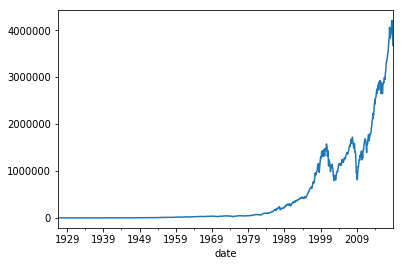

In [69]:
monthly_returns = returns['LargeCap']
wealth_index = 1000 * (1+monthly_returns).cumprod()
wealth_index.plot()

Lalu kita kalkulasi nilai puncak yg tercapai sebelumnya.

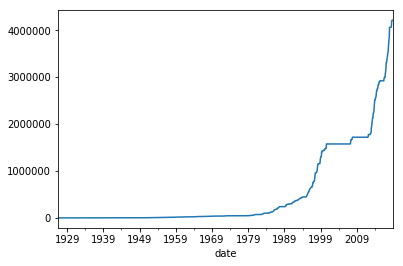

In [70]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

Drawdown dihitung dengan menghitung keuntungan investasi pada suatu saat dibanding dengan puncak sebelumnya:

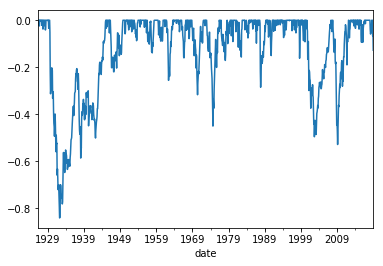

In [71]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

Dari grafik di atas kita bisa melihat *maximum drawdawn* terjadi sekitar tahun 1929, atau di saat *the great recession*. Kita bisa melihat waktu tepatnya kapan sebagai berikut:

In [73]:
drawdown.idxmin()

Period('1932-05', 'M')

Dan nilai drawdawn terbesar dapat kita lihat sebagai berikut:

In [74]:
drawdown.min()

-0.8400375277943124

Kita bisa *zoom* pergerakan nilai investasi di sekitar perioda *the great recession* dengan cara berikut:

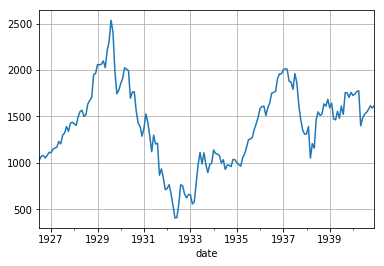

In [77]:
wealth_index[:"1940"].plot(grid=True)

Terlihat bahwa *maximum drawdown* sebesar 84% (seperti kita hitung di atas) terjadi kita kita membeli aset di puncak yaitu di kira-kira tahun 1929 lalu menjualnya di dasar yaitu di kira-kira tahun 1932.

#### Catatan tentang *Drawdown*

Ada beberapa catatan peringatan tentang *drawdown*. Pertama, *drawdown* dihitung dari dua titik data, sehingga rentan terhadap *outliar*. Kedua, *drawdown* tergantung dari frekuensi pengamatan data. Frekuensi pengamatan yang panjang (misalnya mingguan, bulanan) akan menyembunyikan *drawdown* yang ada pada data harian.


## Referensi dan Atribusi

Sebagian besar materi di sini diambil dari materi minggu 1 dari MOOC [Introduction to Portfolio Construction and Analysis with Python](https://www.coursera.org/learn/introduction-portfolio-construction-python).